In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
angkakonsumsiikan = pd.read_csv('angkakonsumsiikan.csv')
jumlahproduksibenih = pd.read_csv('jumlahproduksibenih.csv')
pembudidayaikannasional = pd.read_csv('pembudidayaikannasional.csv')
produkolahanikan = pd.read_csv('produkolahanikan.csv')
produksibudidayanasional = pd.read_csv('produksibudidayanasional.csv')
produksiperlakuanikannasional = pd.read_csv('produksiperlakuanikannasional.csv')
lat_long = pd.read_excel('lat_long.xlsx')

In [59]:
# cek persediaan dan penjualan
penyedia_konsumsi = angkakonsumsiikan[angkakonsumsiikan['ParamKonsumsiIkan'].isin(['Penyediaan ikan untuk konsumsi per kapita', 'Konsumsi ikan per kapita'])]
penyedia_konsumsi = penyedia_konsumsi.drop(['ID', 'Satuan'], axis=1)
penyedia_konsumsi = penyedia_konsumsi.reset_index(drop=True)
penyedia_konsumsi

,ParamKonsumsiIkan,Tahun,Nilai
0,Penyediaan ikan untuk konsumsi per kapita,2008,30.95
1,Konsumsi ikan per kapita,2008,28.00
2,Penyediaan ikan untuk konsumsi per kapita,2009,33.51
3,Konsumsi ikan per kapita,2009,29.08
4,Penyediaan ikan untuk konsumsi per kapita,2010,38.39
5,Konsumsi ikan per kapita,2010,30.48
6,Penyediaan ikan untuk konsumsi per kapita,2011,41.95
7,Konsumsi ikan per kapita,2011,32.25
8,Penyediaan ikan untuk konsumsi per kapita,2012,46.31
9,Konsumsi ikan per kapita,2012,33.89


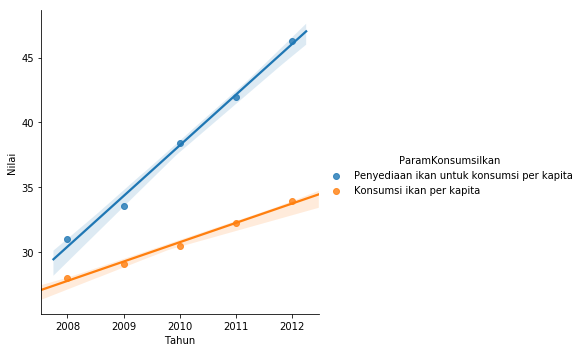

In [60]:
sns.lmplot(x="Tahun", y="Nilai", hue='ParamKonsumsiIkan',data=penyedia_konsumsi)
plt.show()

In [61]:
produksi_nasional = produksibudidayanasional.drop(['IkanID', 'Budidaya', 'ID', 'ProvinsiID'],axis=1)
produksi_nasional['nilaipervolume'] = produksi_nasional['Nilai']/produksi_nasional['Volume']
produksi_nasional = produksi_nasional.fillna(0)
produksi_nasional = produksi_nasional[produksi_nasional['Tahun'].isin([2008, 2009, 2010, 2011, 2012])]
produksi_nasional = pd.merge(produksi_nasional, lat_long, how="left", on="NamaProvinsi")

In [62]:
produksi_nasional_total = produksi_nasional[produksi_nasional['NamaIkan']=='total']
produksi_nasional_total['pop_volume'] =  produksi_nasional_total['Volume']/produksi_nasional_total['Volume'].min()
produksi_nasional_total

C:\Users\daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,NamaProvinsi,NamaIkan,Tahun,Volume,Nilai,nilaipervolume,latitude,longtitude,pop_volume
0,Aceh,total,2008,42824,9.767006e+08,22807.318279,4.695135,96.749399,28.511318
1,Sumatera Utara,total,2008,97583,2.577634e+09,26414.788314,2.115355,99.545097,64.968708
2,Sumatera Barat,total,2008,97545,1.193120e+09,12231.480476,-0.739940,100.800005,64.943409
3,Riau,total,2008,29950,3.859575e+08,12886.728247,0.293347,101.706829,19.940080
4,Jambi,total,2008,21202,2.597884e+08,12253.012735,-1.485183,102.438058,14.115846
5,Sumatera Selatan,total,2008,130478,3.038011e+09,23283.699842,-3.319437,103.914399,86.869507
6,Bengkulu,total,2008,13342,2.110023e+08,15814.891695,-3.577847,102.346388,8.882823
7,Lampung,total,2008,186158,3.769126e+09,20246.920460,-4.558585,105.406808,123.940080
8,Kepulauan Bangka Belitung,total,2008,1502,3.290829e+07,21909.649800,-2.741051,106.440587,1.000000
9,Kepulauan Riau,total,2008,4998,1.652560e+08,33064.431973,3.945651,108.142867,3.327563


In [63]:
import plotly.express as px
fig = px.scatter_geo(produksi_nasional_total, 
                     lat = 'latitude',
                     lon = 'longtitude',
                     size= 'pop_volume',
                     hover_name="NamaProvinsi",
                     animation_frame="Tahun",
                     #projection="orthographic"
                     )
fig.show()

In [64]:
produksi_nasional[produksi_nasional['NamaProvinsi']=='Sulawesi Selatan']

,NamaProvinsi,NamaIkan,Tahun,Volume,Nilai,nilaipervolume,latitude,longtitude
25,Sulawesi Selatan,total,2008,738640,4.077757e+09,5520.628088,-3.668799,119.974053
58,Sulawesi Selatan,total,2009,865899,2.792847e+09,3225.373024,-3.668799,119.974053
91,Sulawesi Selatan,total,2010,1357366,4.674047e+09,3443.468683,-3.668799,119.974053
124,Sulawesi Selatan,total,2011,1633274,4.665860e+09,2856.752977,-3.668799,119.974053
157,Sulawesi Selatan,udang total,2008,19933,7.039797e+08,35317.297246,-3.668799,119.974053
190,Sulawesi Selatan,udang total,2009,17829,5.913562e+08,33168.218913,-3.668799,119.974053
223,Sulawesi Selatan,udang total,2010,22844,1.134618e+09,49668.118543,-3.668799,119.974053
256,Sulawesi Selatan,udang total,2011,20738,1.085120e+09,52325.200839,-3.668799,119.974053
289,Sulawesi Selatan,kerapu,2008,1,5.140600e+04,51406.000000,-3.668799,119.974053
322,Sulawesi Selatan,kerapu,2009,1,2.133000e+05,213300.000000,-3.668799,119.974053
